## Q4 

A reaction with stoichiometry 2A + C $\to$ D has the following mechanism:

\begin{equation}
2\mathrm{A}\xrightarrow{k_1}B,
\end{equation}

\begin{equation}
\mathrm{B}+\mathrm{C}\xrightarrow{k_2}D.
\end{equation}

with rate constants:
$k_1 = 0.05$ M<sup>-1</sup> s<sup>-1</sup> and $k_2 = 0.1$ M<sup>-1</sup> s<sup>-1</sup>.

The initial concentrations are $\left[\mathrm{A}\right]_0 = 5$ M; $\left[\mathrm{B}\right]_0 = 0$ M; $\left[\mathrm{C}\right]_0 = 1$ M; $\left[\mathrm{D}\right]_0 = 0$ M.



a)	Write differential rate equations for $\frac{\mathrm{d}[\mathrm{A}]}{\mathrm{d}t}$, $\frac{\mathrm{d}[\mathrm{B}]}{\mathrm{d}t}$, $\frac{\mathrm{d}[\mathrm{C}]}{\mathrm{d}t}$ and $\frac{\mathrm{d}[\mathrm{D}]}{\mathrm{d}t}$.

## answer

\begin{equation}
\frac{\mathrm{d}[\mathrm{A}]}{\mathrm{d}t} = -2k_1[\mathrm{A}]^2.\tag{1}
\end{equation}

\begin{equation}
\frac{\mathrm{d}[\mathrm{B}]}{\mathrm{d}t} = +k_1[\mathrm{A}]^2 - k_2[\mathrm{B}][\mathrm{C}].\tag{2}
\end{equation}

\begin{equation}
\frac{\mathrm{d}[\mathrm{C}]}{\mathrm{d}t} = -k_2[\mathrm{B}][\mathrm{C}].\tag{3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}[\mathrm{D}]}{\mathrm{d}t} = +k_2[\mathrm{B}][\mathrm{C}].\tag{4}
\end{equation}

b)	Write expressions for $[\mathrm{A}]_{t+\Delta t}$, $[\mathrm{A}]_{t+\Delta t}$, $[\mathrm{A}]_{t+\Delta t}$, $[\mathrm{A}]_{t+\Delta t}$, in terms of $\Delta t$, $[\mathrm{A}]_t$, $[\mathrm{B}]_t$, $[\mathrm{C}]_t$, and $[\mathrm{D}]_t$.


## answer

Integrating using the trapezium rule:

\begin{equation}
[\mathrm{A}]_{t+\Delta t} = [\mathrm{A}]_t + \frac{\mathrm{d}[\mathrm{A}]}{\mathrm{d}t}\cdot\Delta t
\end{equation}

\begin{equation}
[\mathrm{B}]_{t+\Delta t} = [\mathrm{B}]_t + \frac{\mathrm{d}[\mathrm{B}]}{\mathrm{d}t}\cdot\Delta t
\end{equation}

\begin{equation}
[\mathrm{C}]_{t+\Delta t} = [\mathrm{C}]_t + \frac{\mathrm{d}[\mathrm{C}]}{\mathrm{d}t}\cdot\Delta t
\end{equation}

\begin{equation}
[\mathrm{D}]_{t+\Delta t} = [\mathrm{D}]_t + \frac{\mathrm{d}[\mathrm{D}]}{\mathrm{d}t}\cdot\Delta t
\end{equation}

using the rate equations above, these can be written as:

\begin{equation}
[\mathrm{A}]_{t+\Delta t} = [\mathrm{A}]_t - 2k_1[\mathrm{A}]_t^2\cdot\Delta t
\end{equation}

\begin{equation}
[\mathrm{B}]_{t+\Delta t} = [\mathrm{B}]_t + k_1[\mathrm{A}]_t^2 - k_2[\mathrm{B}]_t[\mathrm{C}]_t\cdot\Delta t
\end{equation}

\begin{equation}
[\mathrm{C}]_{t+\Delta t} = [\mathrm{C}]_t - k_2[\mathrm{B}]_t[\mathrm{C}]_t\cdot\Delta t
\end{equation}

\begin{equation}
[\mathrm{D}]_{t+\Delta t} = [\mathrm{D}]_t + k_2[\mathrm{B}]_t[\mathrm{C}]_t\cdot\Delta t
\end{equation}

In [1]:
# writing each rate equation 1–4 as a function

def dA_by_dt( A, k1 ):
    return -2*k1*A**2

def dB_by_dt( A, B, C, k1, k2 ):
    return +k1*A**2 - k2*B*C

def dC_by_dt( B, C, k2 ):
    return -k2*B*C

def dD_by_dt( B, C, k2 ):
    return +k2*B*C

In [2]:
# initial concentrations

A_0 = 5.0
B_0 = 0.0
C_0 = 2.0
D_0 = 0.0

# rates

k1 = 0.05
k2 = 0.1

# timestep

dt = 0.01

In [3]:
A = A_0
B = B_0
C = C_0
D = D_0

A_conc = [A]
B_conc = [B]
C_conc = [C]
D_conc = [D]

time = 0.0
max_time = 10.0

while time < max_time:
    A = A + dA_by_dt( A, k1 ) * dt
    B = B + dB_by_dt( A, B, C, k1, k2 ) * dt
    C = C + dC_by_dt( B, C, k2 ) * dt
    D = D + dD_by_dt( B, C, k2 ) * dt
    
    A_conc.append( A )
    B_conc.append( B )
    C_conc.append( C )
    D_conc.append( D )
    
    time += dt

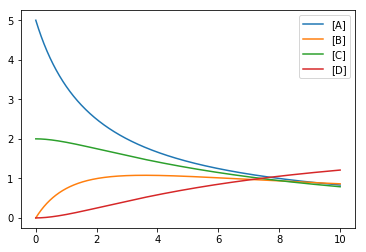

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

times = np.arange( len( A_conc ) ) * dt

plt.plot( times, A_conc, label='[A]' )
plt.plot( times, B_conc, label='[B]' )
plt.plot( times, C_conc, label='[C]' )
plt.plot( times, D_conc, label='[D]' )

plt.legend()
plt.show()

In [5]:
print( times[ np.argmax( B_conc ) ] )

3.58
